# Visualize Markov Decision Processes

`````{margin}
````{dropdown} Necessary imports
```{code-block} python
import matplotlib
from matplotlib import pyplot as plt

from colosseum.mdp.deep_sea import DeepSeaContinuous
from colosseum.mdp.frozen_lake import FrozenLakeContinuous
from colosseum.mdp.minigrid_empty import MiniGridEmptyContinuous
from colosseum.mdp.minigrid_rooms import MiniGridRoomsContinuous
from colosseum.mdp.simple_grid import SimpleGridContinuous
from colosseum.mdp.taxi import TaxiContinuous
from colosseum.analysis.visualization import plot_MDP_graph, plot_MCGraph
```
````
`````

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib
from matplotlib import pyplot as plt
from myst_nb import glue

from colosseum.mdp.deep_sea import DeepSeaContinuous
from colosseum.mdp.frozen_lake import FrozenLakeContinuous
from colosseum.mdp.minigrid_empty import MiniGridEmptyContinuous
from colosseum.mdp.minigrid_rooms import MiniGridRoomsContinuous
from colosseum.mdp.simple_grid import SimpleGridContinuous
from colosseum.mdp.taxi import TaxiContinuous
from colosseum.analysis.visualization import plot_MDP_graph, plot_MCGraph

This tutorial presents the tools available in {{col}} to visually inspect the transition structure of small-scale MDPs.
These visualization tools can be also be used to visualise information related to states and state-actions pairs, e.g. value functions.


<h4> Transition structure visualizations </h4>

Two main visualizations based on directed graphs are possible, the full MDP representation and the state-only representation.
{{col}} also allow to easily include information related to states and state-actions pairs,


**Full MDP representation**

The [`plot_MDP_graph`](../pdoc_files/colosseum/utils/visualization.html#plot_MDP_graph) function produces a representation in which states are associated with round nodes and actions to square nodes.
Each state is connected to action nodes for all the available actions.
Each action node is connected to the state node such that the probability of transitioning to them when playing the corresponding action from
the corresponding state is greater than zero.

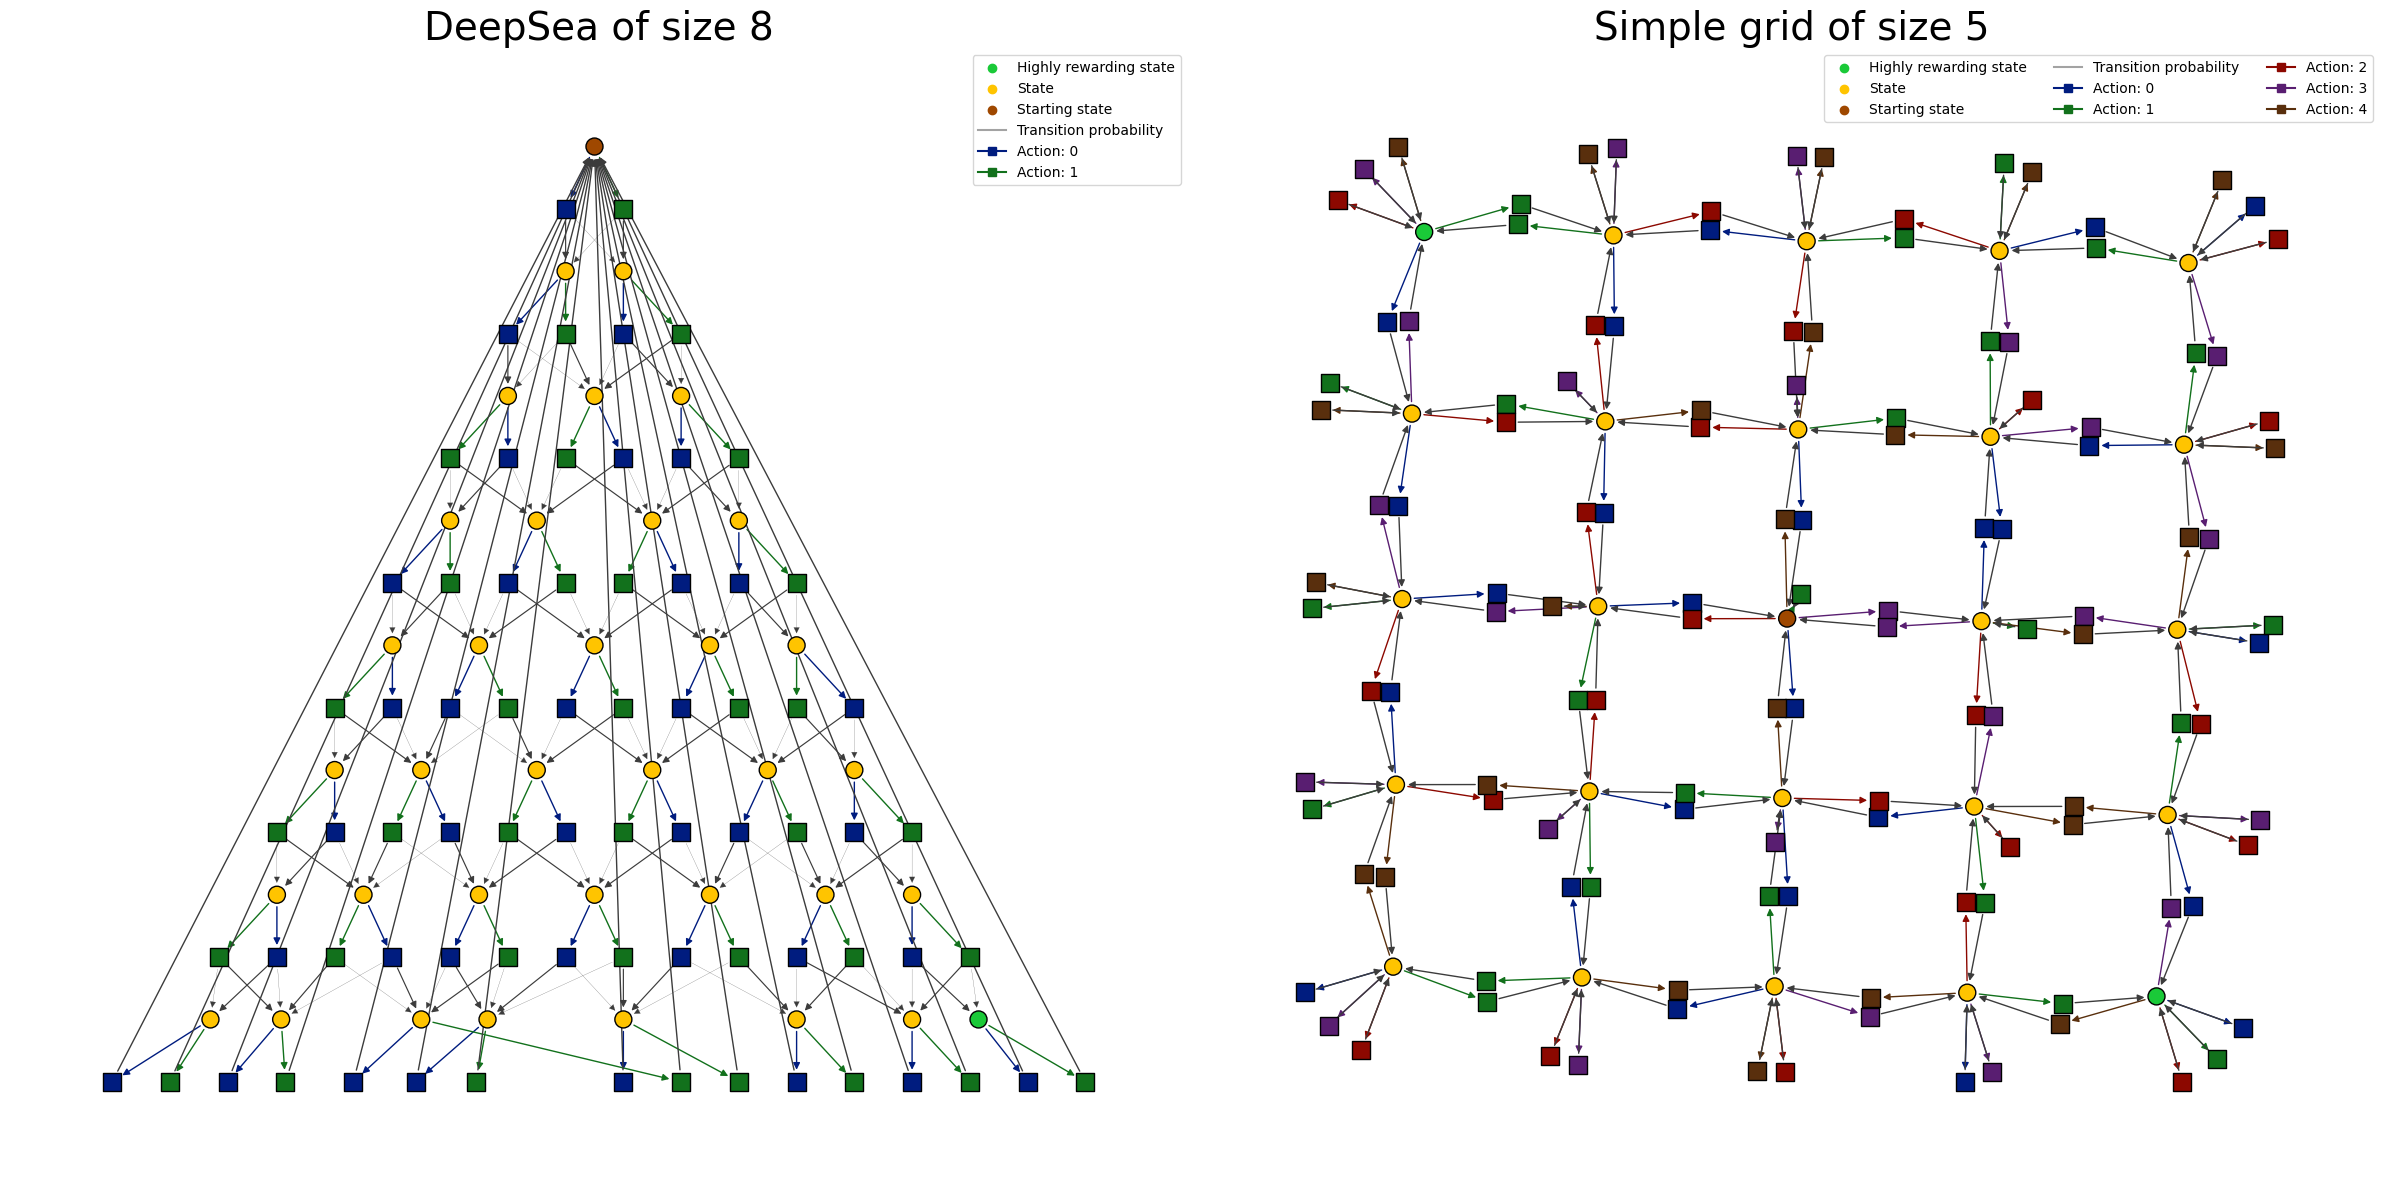

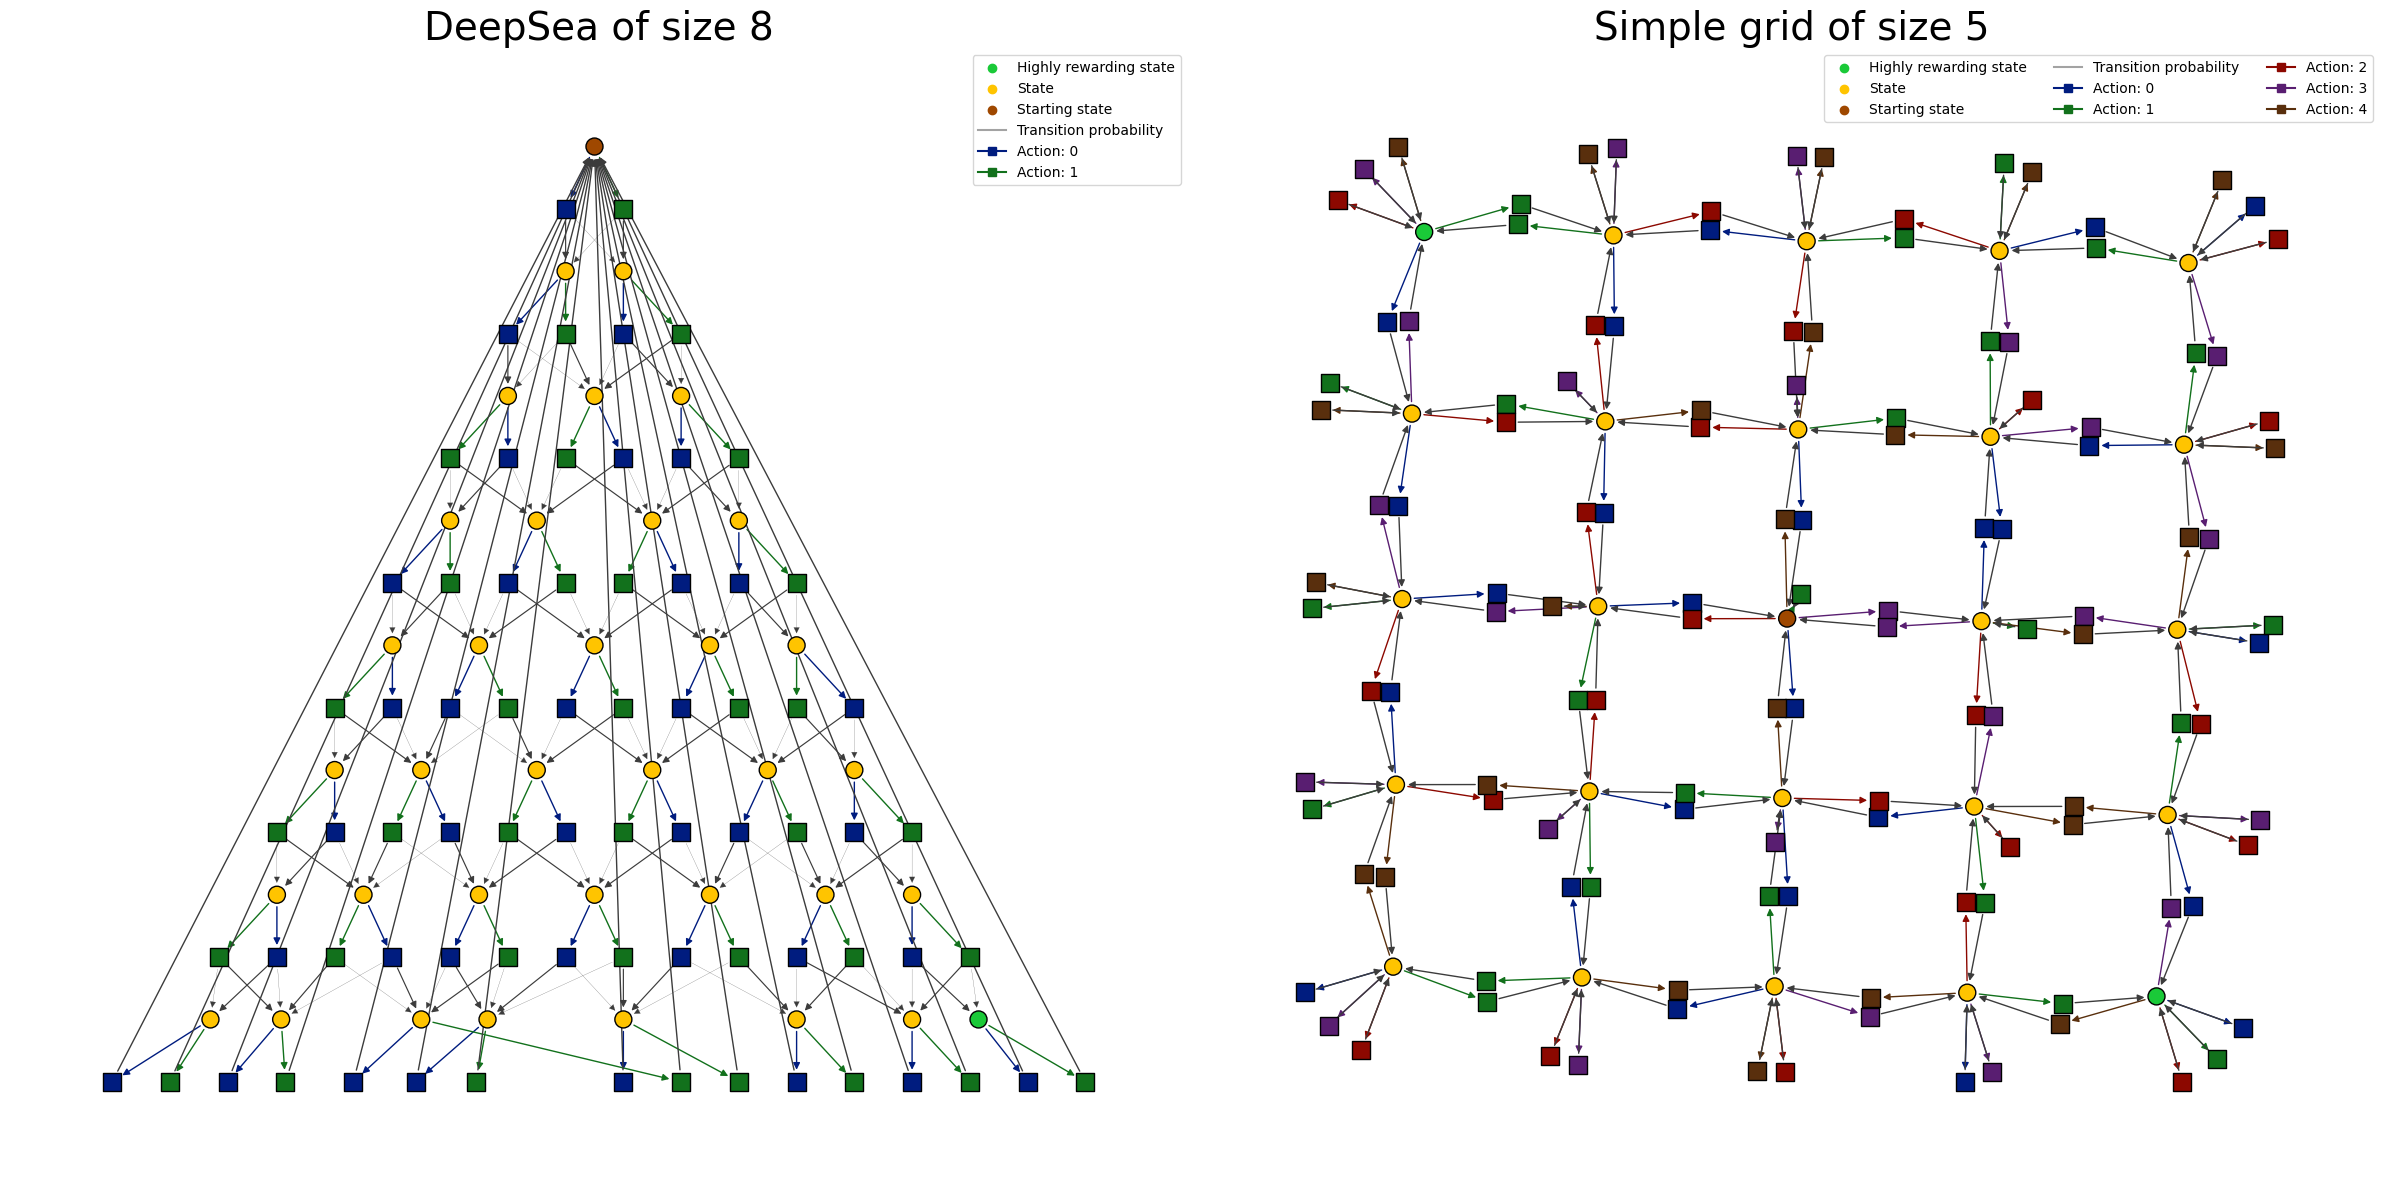

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

mdp = DeepSeaContinuous(seed=0, size=8, p_rand=0.3)
plot_MDP_graph(mdp, prog="dot", ncol=1, ax=ax1)
ax1.set_title("DeepSea of size 8", fontsize=28)

mdp = SimpleGridContinuous(seed=0, size=5)
plot_MDP_graph(mdp, ncol=3, ax=ax2)
ax2.set_title("Simple grid of size 5", fontsize=28)

plt.tight_layout()
plt.show()
glue("mdp_representation1", fig, display=False)

````{div} full-width
```{glue:figure} mdp_representation1
```
````

**State-only representation**

The [`plot_MCGraph`](../pdoc_files/colosseum/utils/visualization.html#plot_MCGraph) function produces a representation in which states are associated with nodes whereas actions are not visualized.
Each state is connected to states such that there exists at least one action with transition probability of transition to them greater than zero.

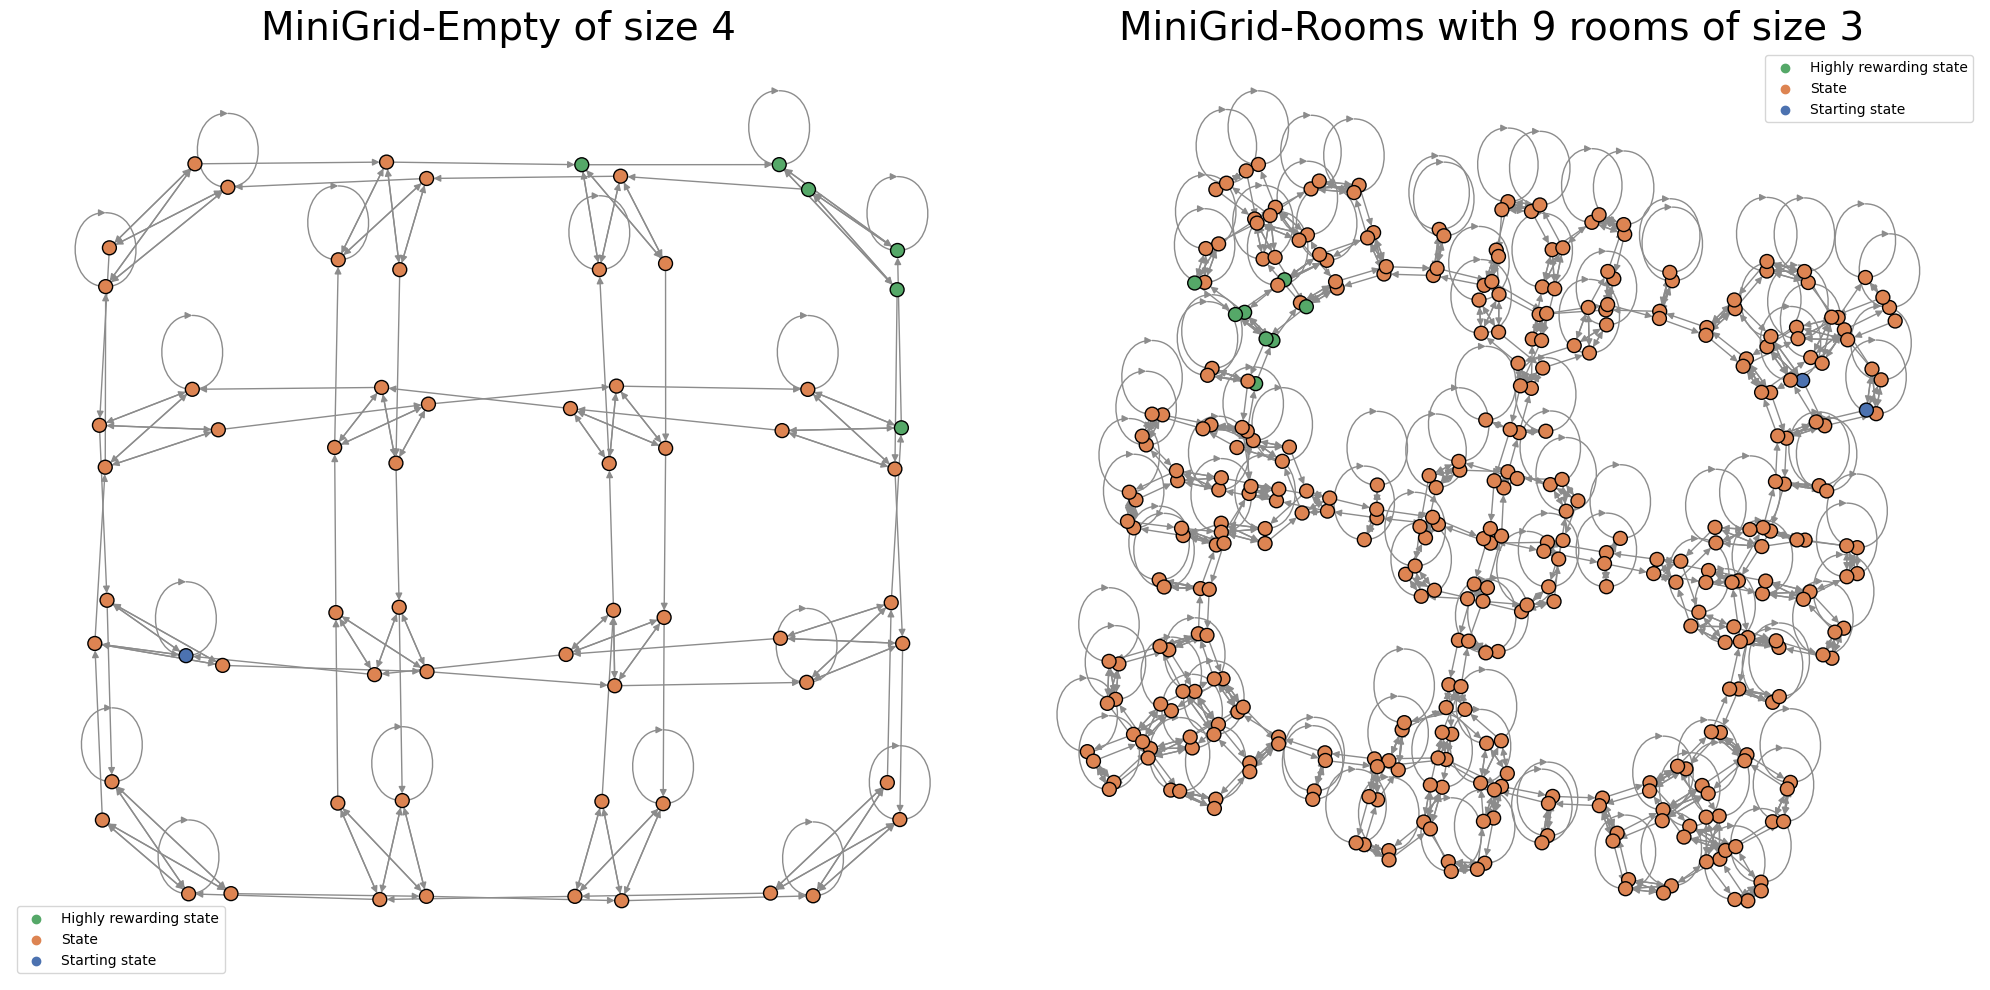

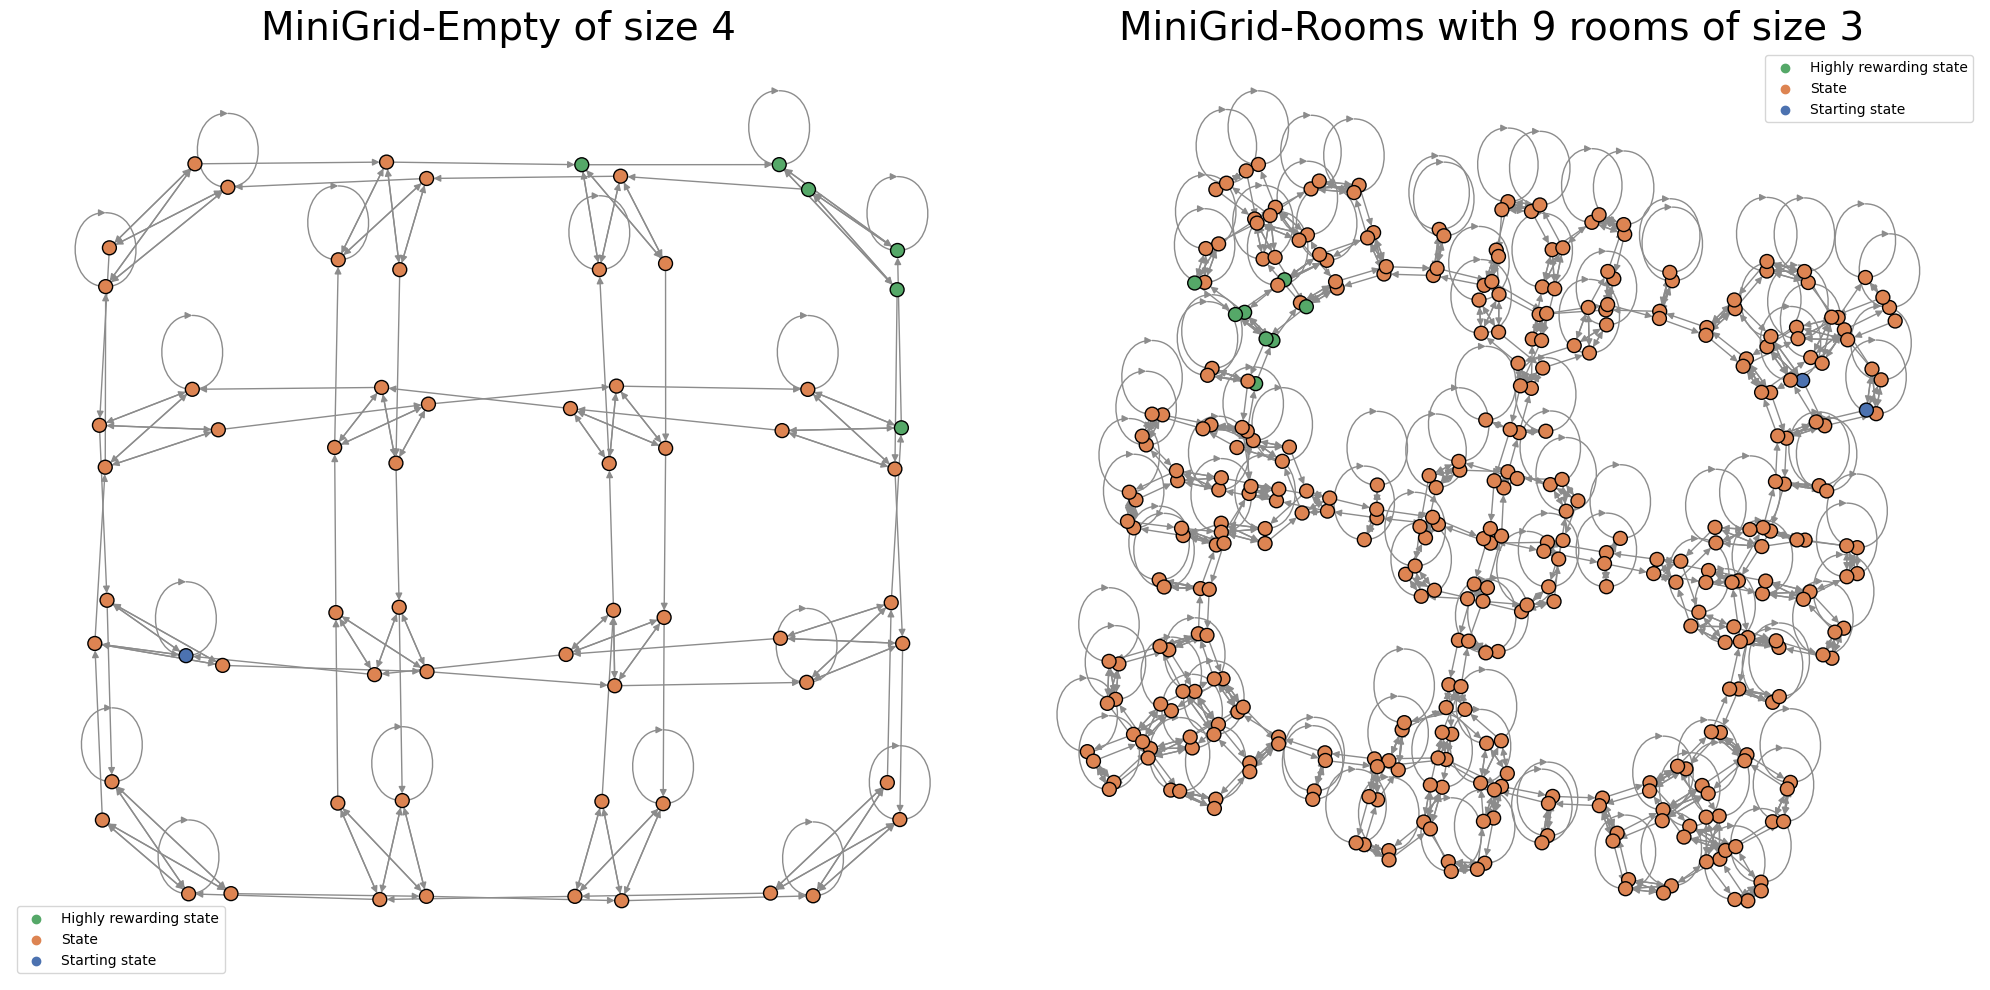

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

mdp = MiniGridEmptyContinuous(seed=0, size=4)
plot_MCGraph(mdp, ax=ax1)
ax1.set_title("MiniGrid-Empty of size 4", fontsize=28)

mdp = MiniGridRoomsContinuous(seed=0, room_size=3, n_rooms=9)
plot_MCGraph(mdp, ax=ax2)
ax2.set_title("MiniGrid-Rooms with 9 rooms of size 3", fontsize=28)

plt.tight_layout()
plt.show()
glue("mdp_representation2", fig, display=False)

````{div} full-width
```{glue:figure} mdp_representation2
```
````

Note that, although the full MDP representation enables inspecting the full MDP transition structure, complex structures yield cumbersome plots.
In many cases, the state-only representation produces more easily interpretable visualizations at a little price in terms of information loss.

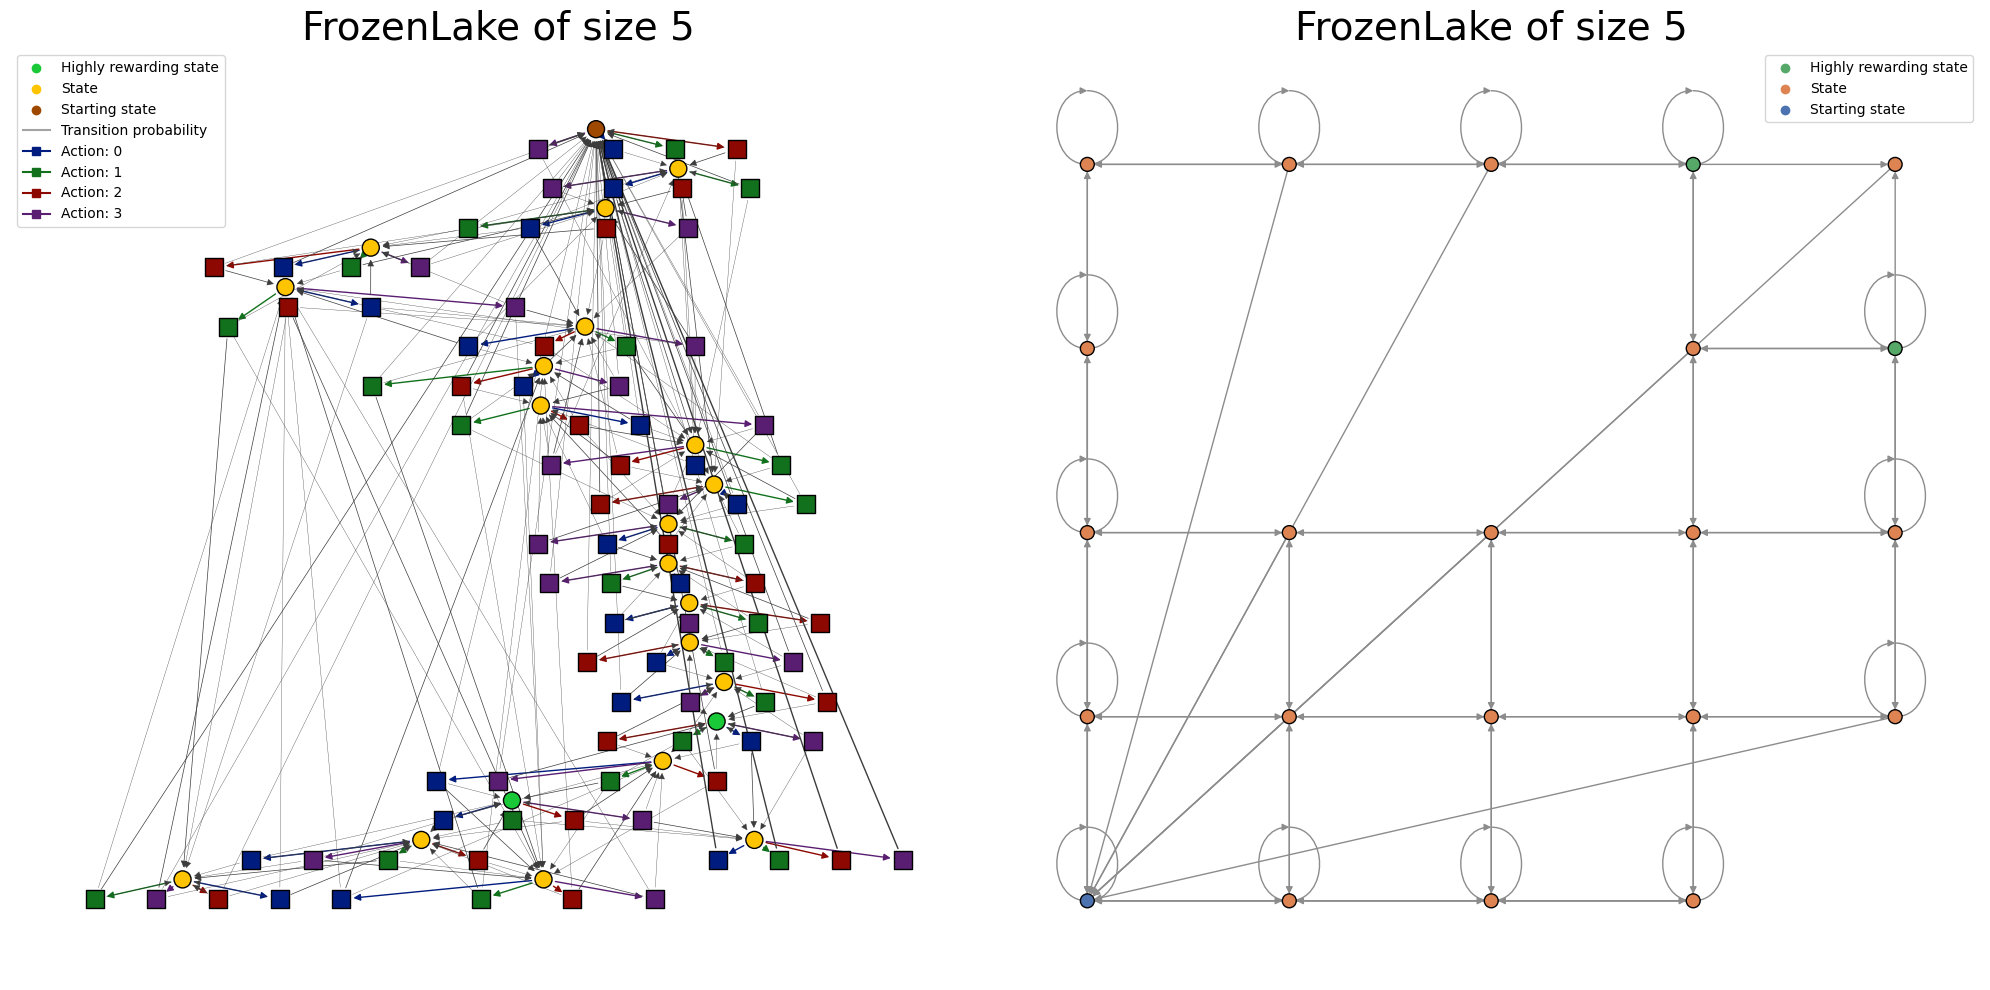

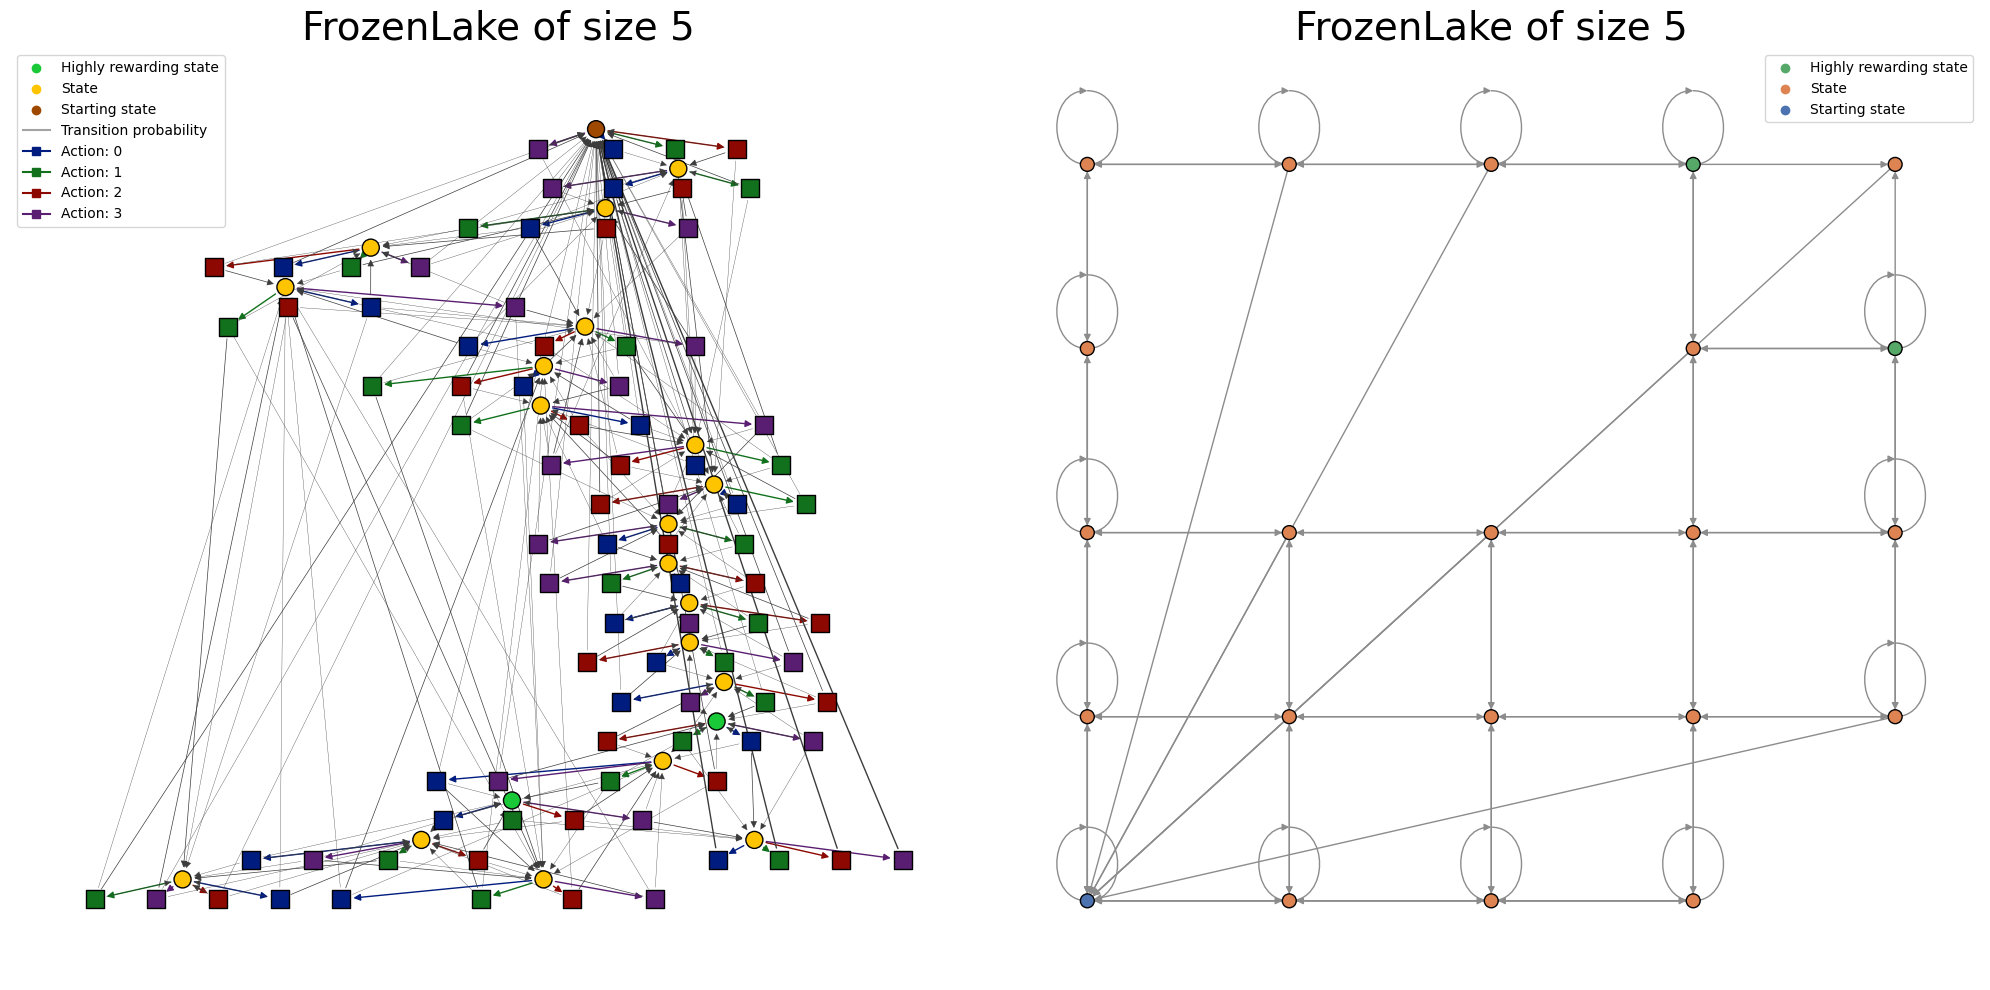

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

mdp = FrozenLakeContinuous(seed=0, size=5, p_frozen=0.9)
plot_MDP_graph(mdp, prog="dot", ncol=1, ax=ax1)
ax1.set_title("FrozenLake of size 5", fontsize=28)

mdp = FrozenLakeContinuous(seed=0, size=5, p_frozen=0.9)
plot_MCGraph(mdp, ax=ax2)
ax2.set_title("FrozenLake of size 5", fontsize=28)

plt.tight_layout()
plt.show()
glue("mdp_representation3", fig, display=False)

````{div} full-width
```{glue:figure} mdp_representation3
```
````

Note that there are some cases in which the complexity of the transition kernel simply prevents intuitive visualizations.

/tmp/ipykernel_346104/432054588.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


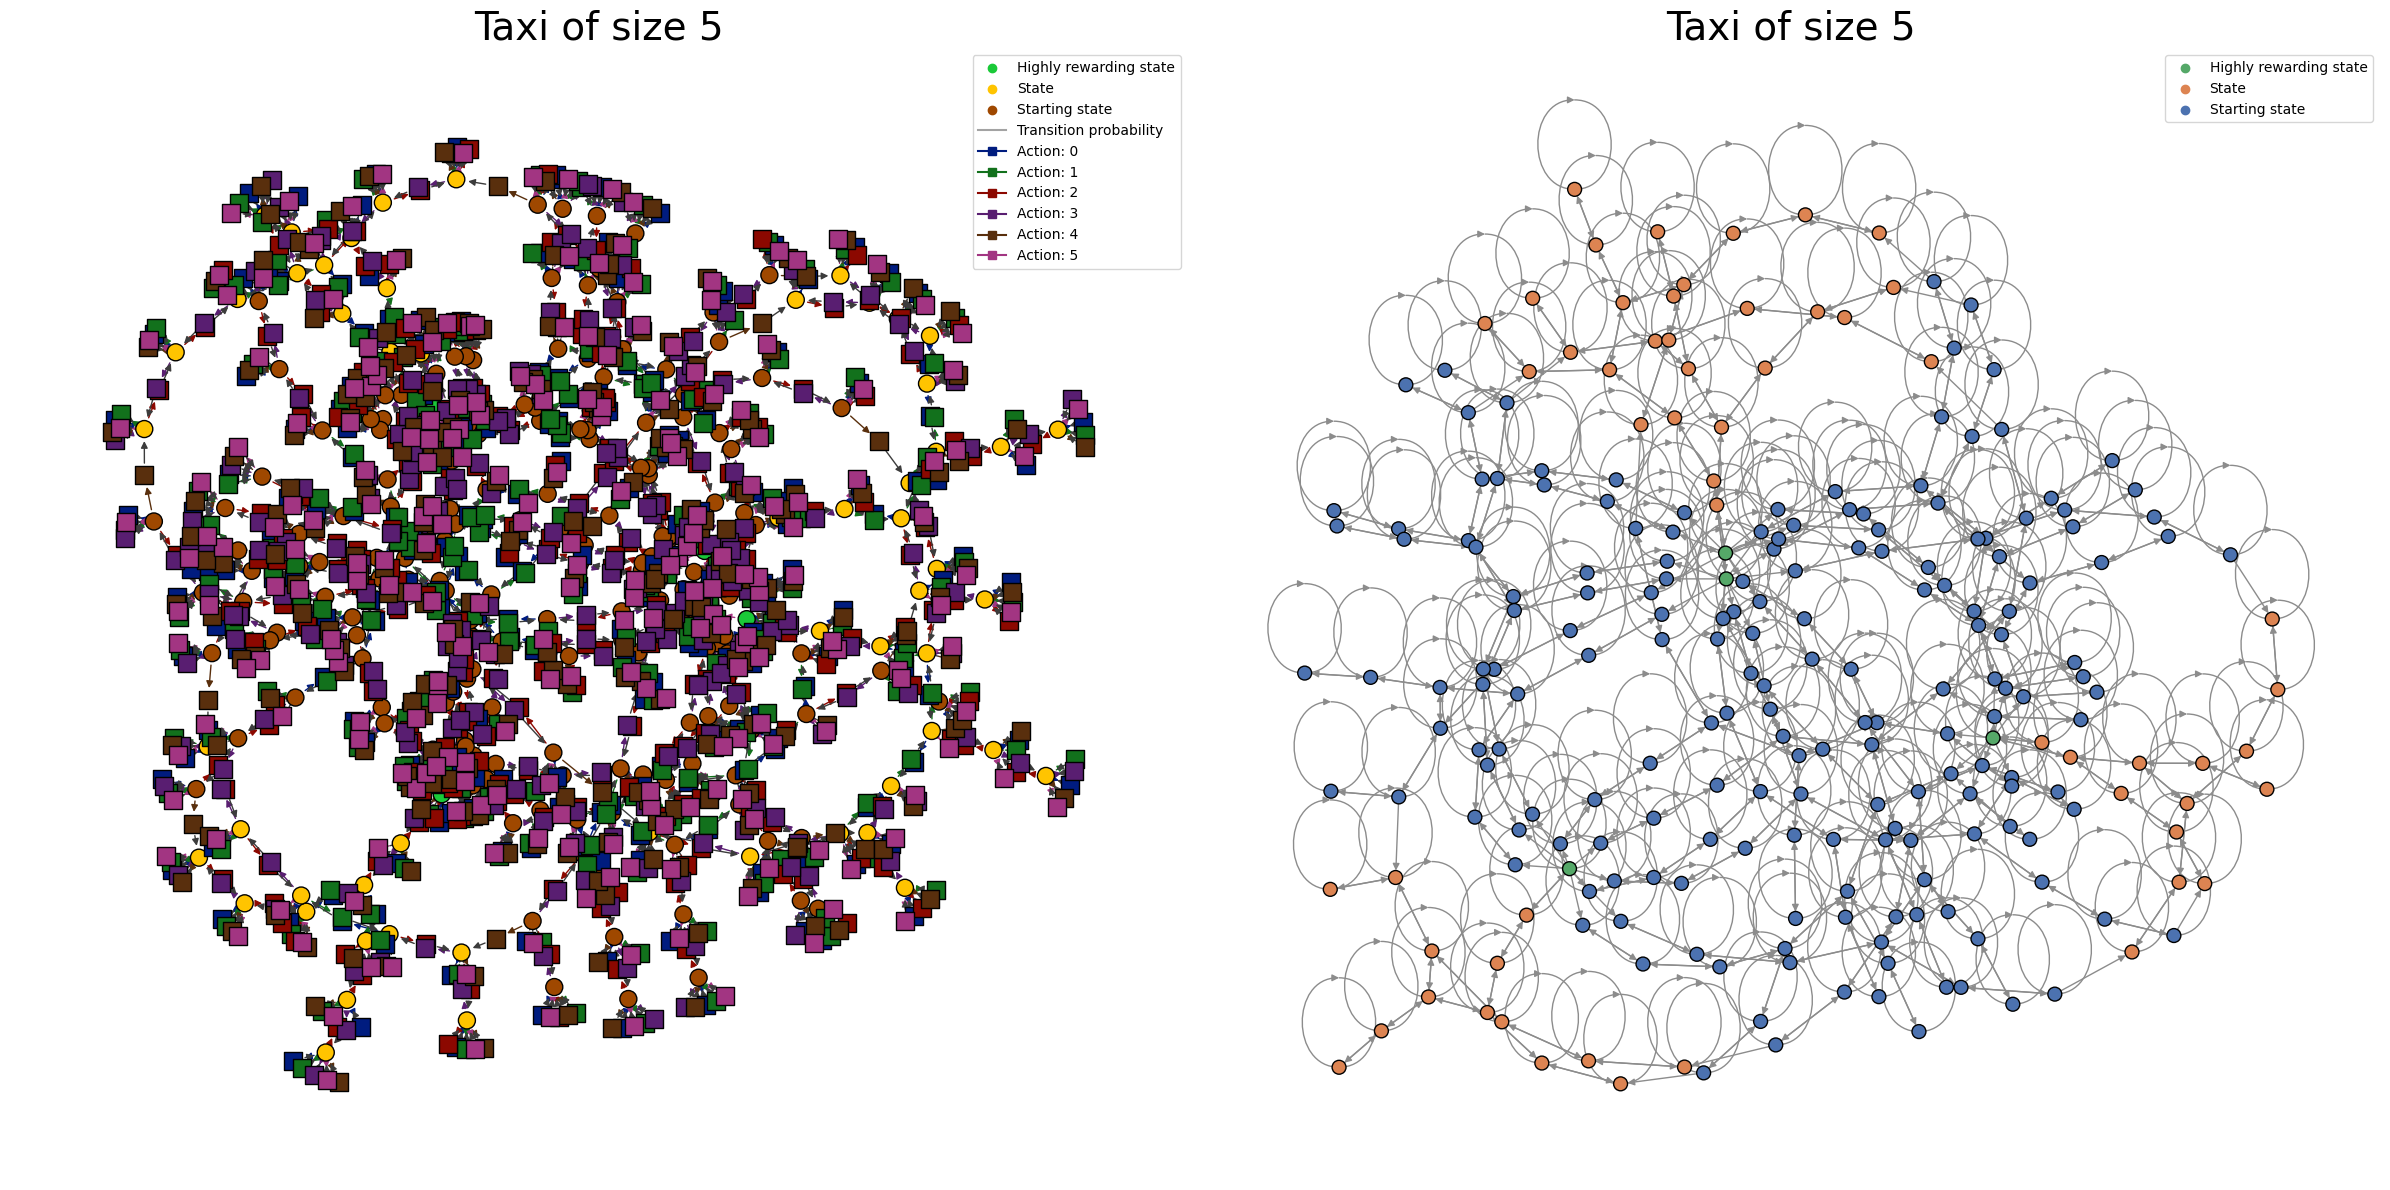

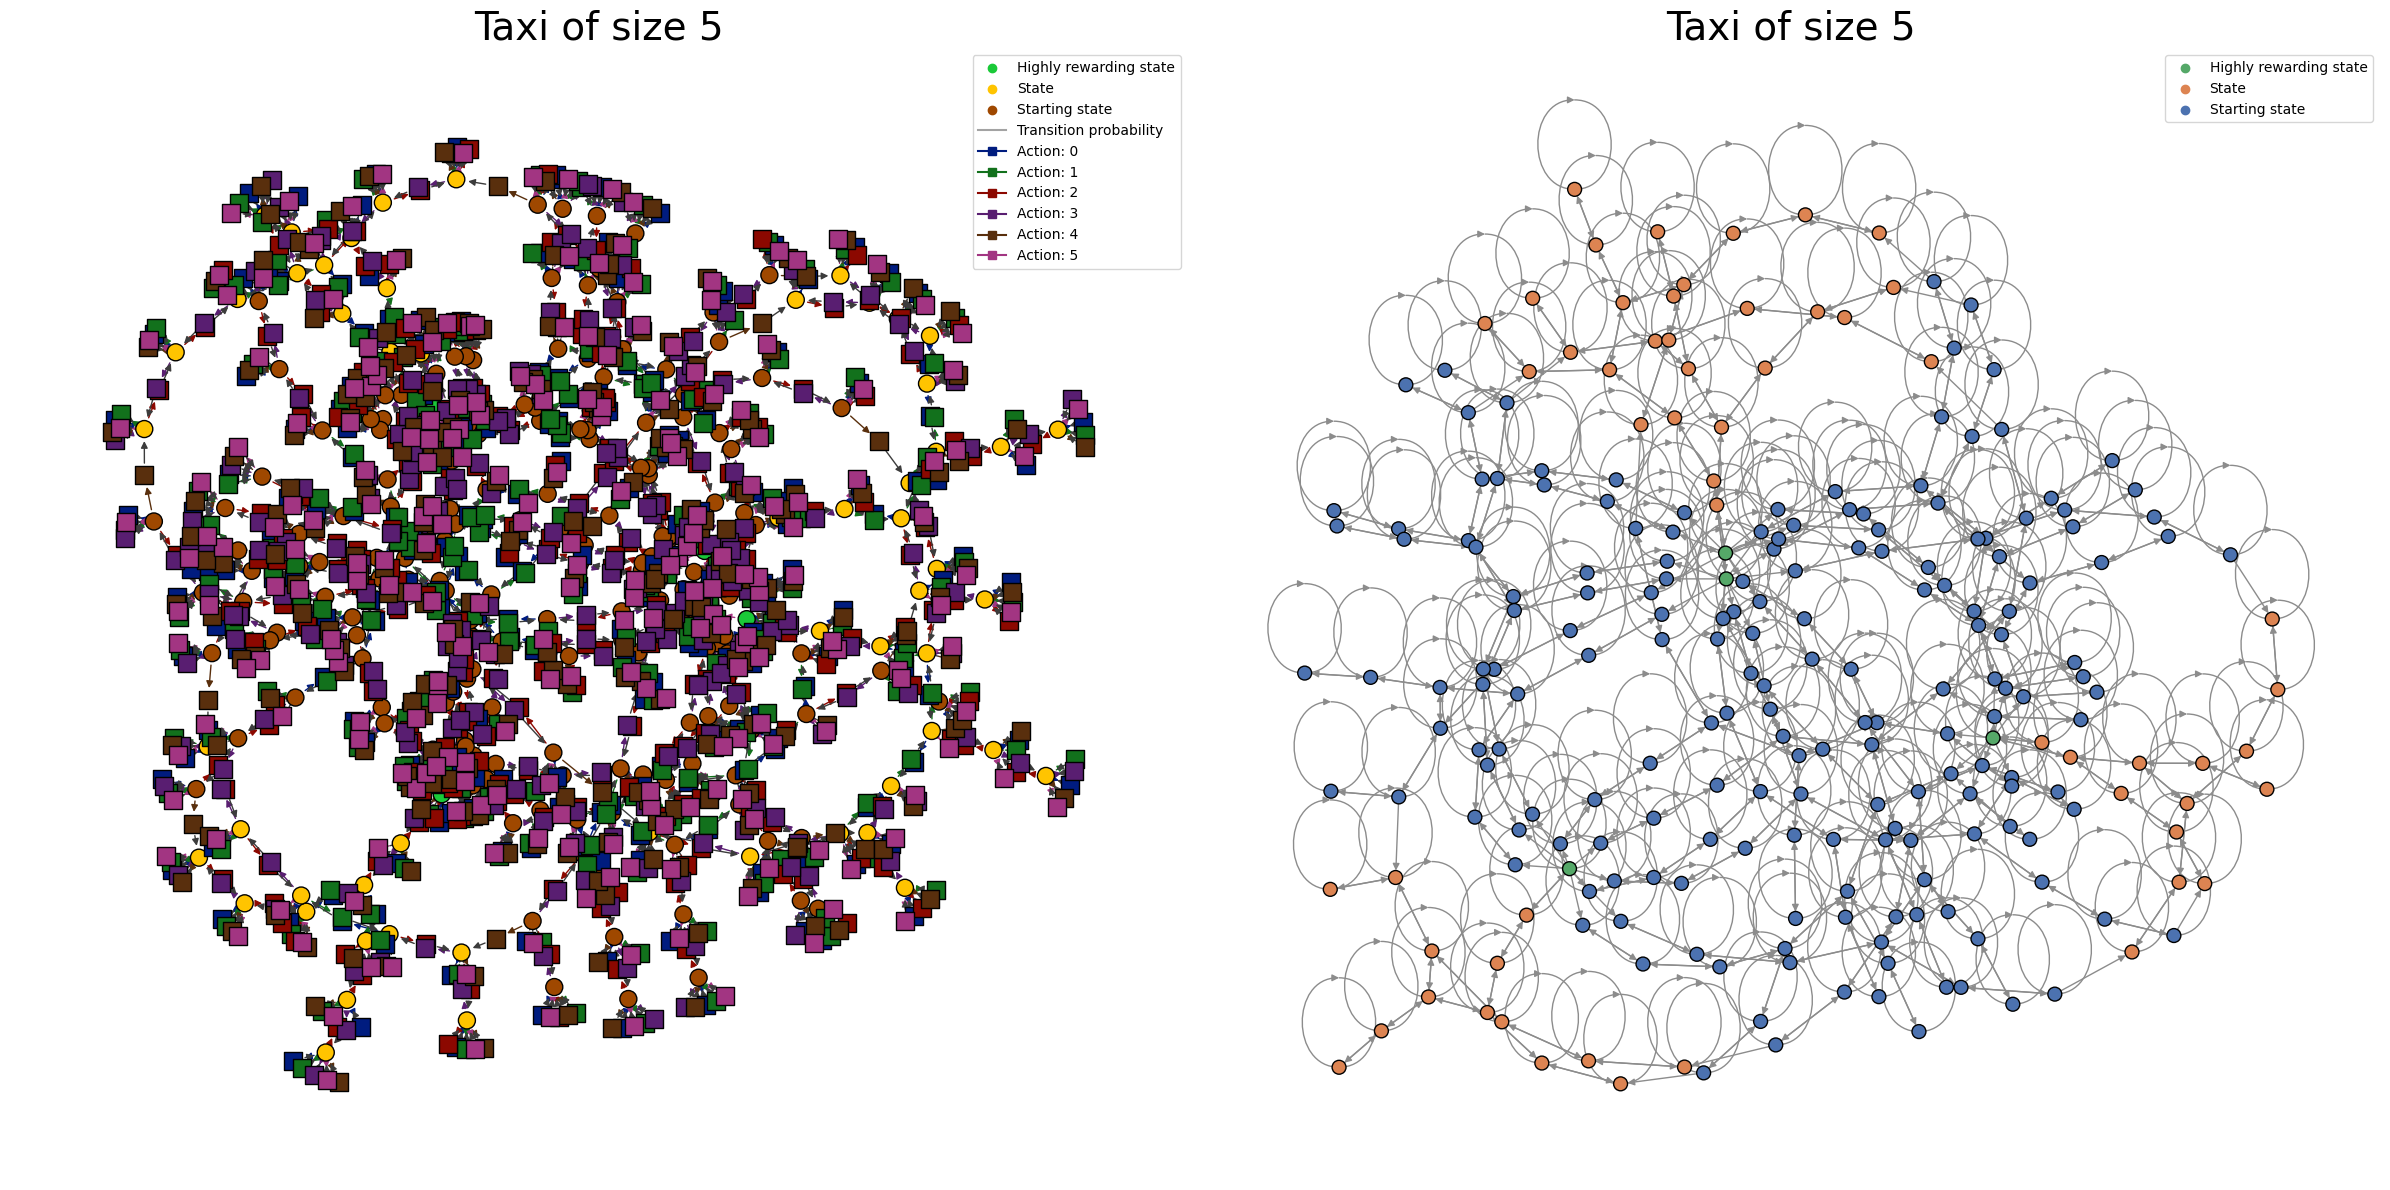

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

mdp = TaxiContinuous(seed=0, size=5)
plot_MDP_graph(mdp, ncol=1, ax=ax1)
ax1.set_title("Taxi of size 5", fontsize=28)

mdp = TaxiContinuous(seed=0, size=5)
plot_MCGraph(mdp, ax=ax2)
ax2.set_title("Taxi of size 5", fontsize=28)

plt.tight_layout()
plt.show()
glue("mdp_representation4", fig, display=False)

````{div} full-width
```{glue:figure} mdp_representation4
```
````


<h4> Information logging </h4>

Information can be displayed in the visualization with textual labels or heatmaps.
We'll show how to visualize the visitation counts and the optimal value function.

**State visitation counts**

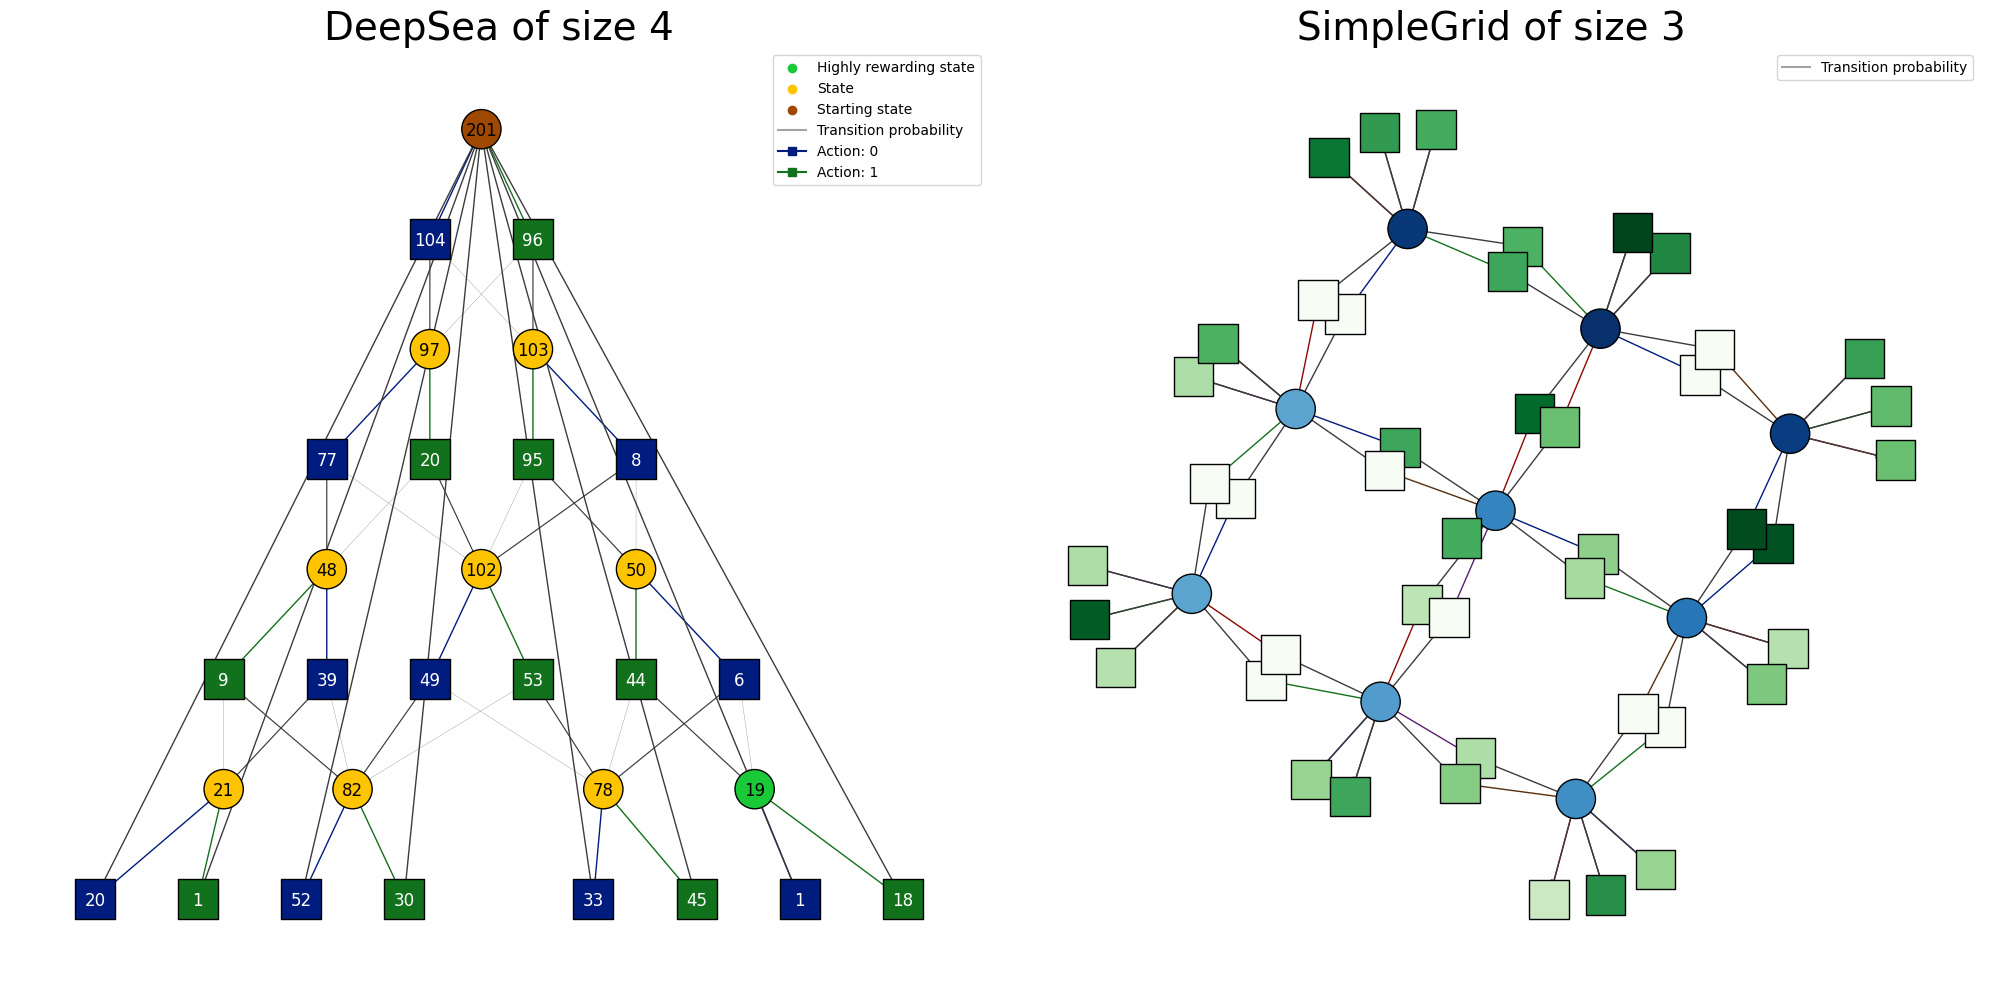

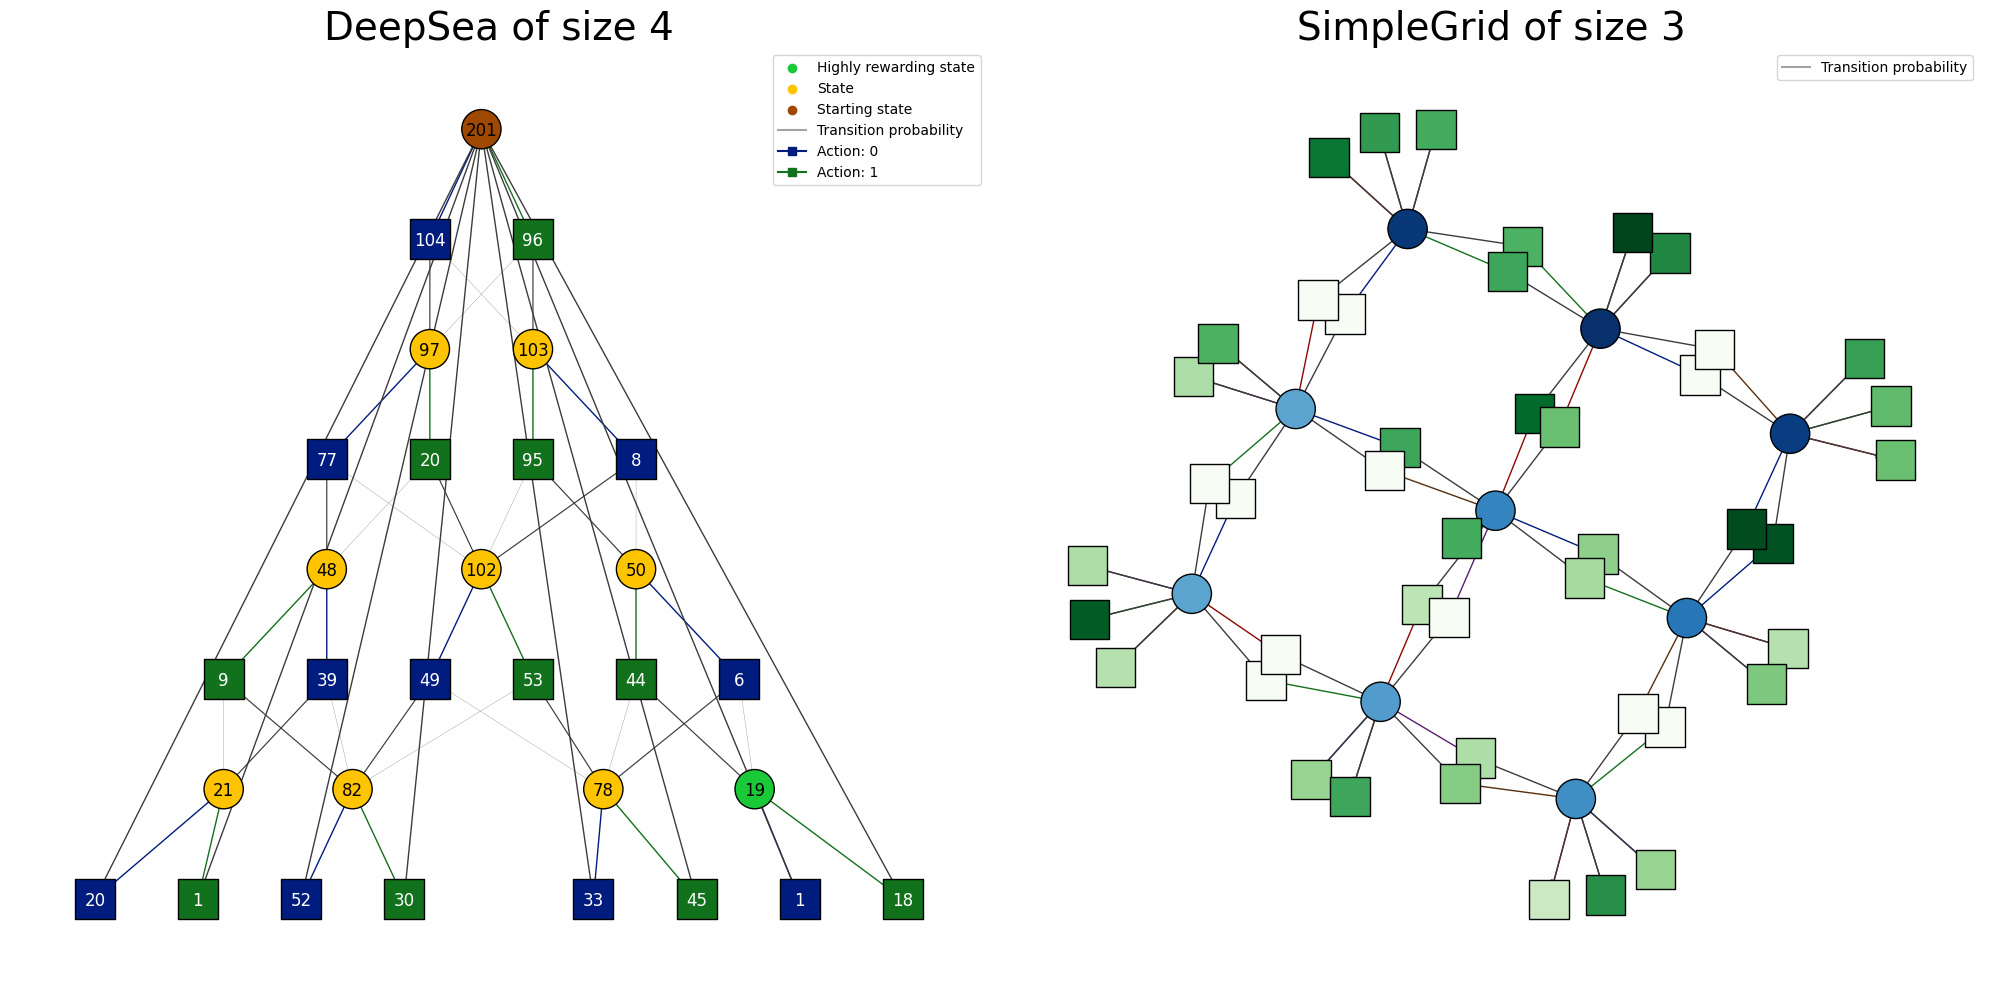

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Obtain visitation counts by choosing actions at random
mdp = DeepSeaContinuous(seed=0, size=4, p_rand=0.3)
mdp.reset()
for _ in range(800):
    mdp.random_step()

# Obtain the state and state-action pairs visitation counts
node_labels = mdp.get_visitation_counts()
action_labels = mdp.get_visitation_counts(False)

plot_MDP_graph(
    mdp,
    prog="dot",
    ncol=1,
    node_labels=node_labels,
    action_labels=action_labels,
    int_labels_offset_x=0,
    int_labels_offset_y=0,
    font_color_state_actions_labels="white",
    no_written_state_action_labels=False,
    no_written_state_labels=False,
    node_size=800,
    ax=ax1
)
ax1.set_title("DeepSea of size 4", fontsize=28)

mdp = SimpleGridContinuous(seed=0, size=3)
mdp.reset()
for _ in range(800):
    mdp.random_step()
node_labels = mdp.get_visitation_counts()
action_labels = mdp.get_visitation_counts(False)
plot_MDP_graph(
    mdp,
    ncol=1,
    node_labels=node_labels,
    action_labels=action_labels,
    # Blue heatmap for the state visitation counts
    cm_state_labels=matplotlib.cm.get_cmap("Blues"),
    # Green heatmap for the state-action visitation counts
    cm_state_actions_labels=matplotlib.cm.get_cmap("Greens"),
    node_size=800,
    ax=ax2
)
ax2.set_title("SimpleGrid of size 3", fontsize=28)

plt.tight_layout()
plt.show()
glue("mdp_representation5", fig, display=False)

````{div} full-width
```{glue:figure} mdp_representation5
```
````

**Value function visualization**

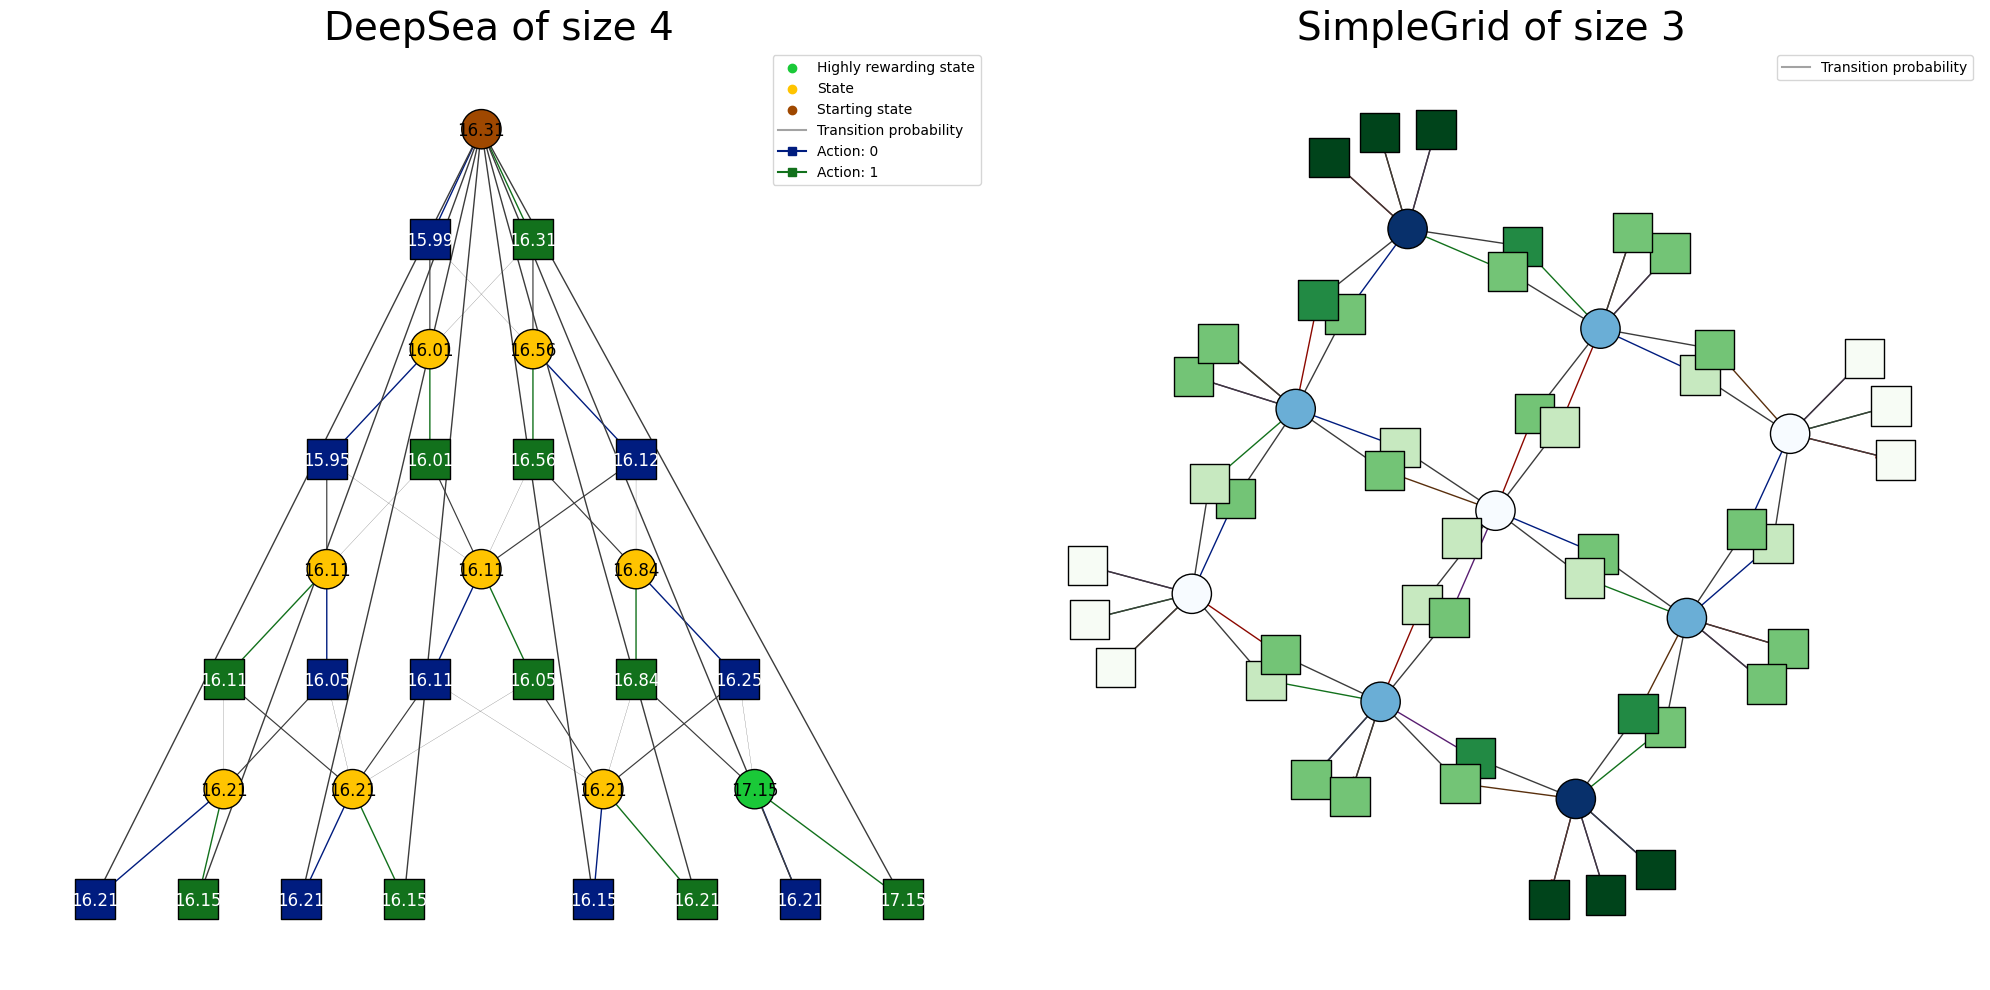

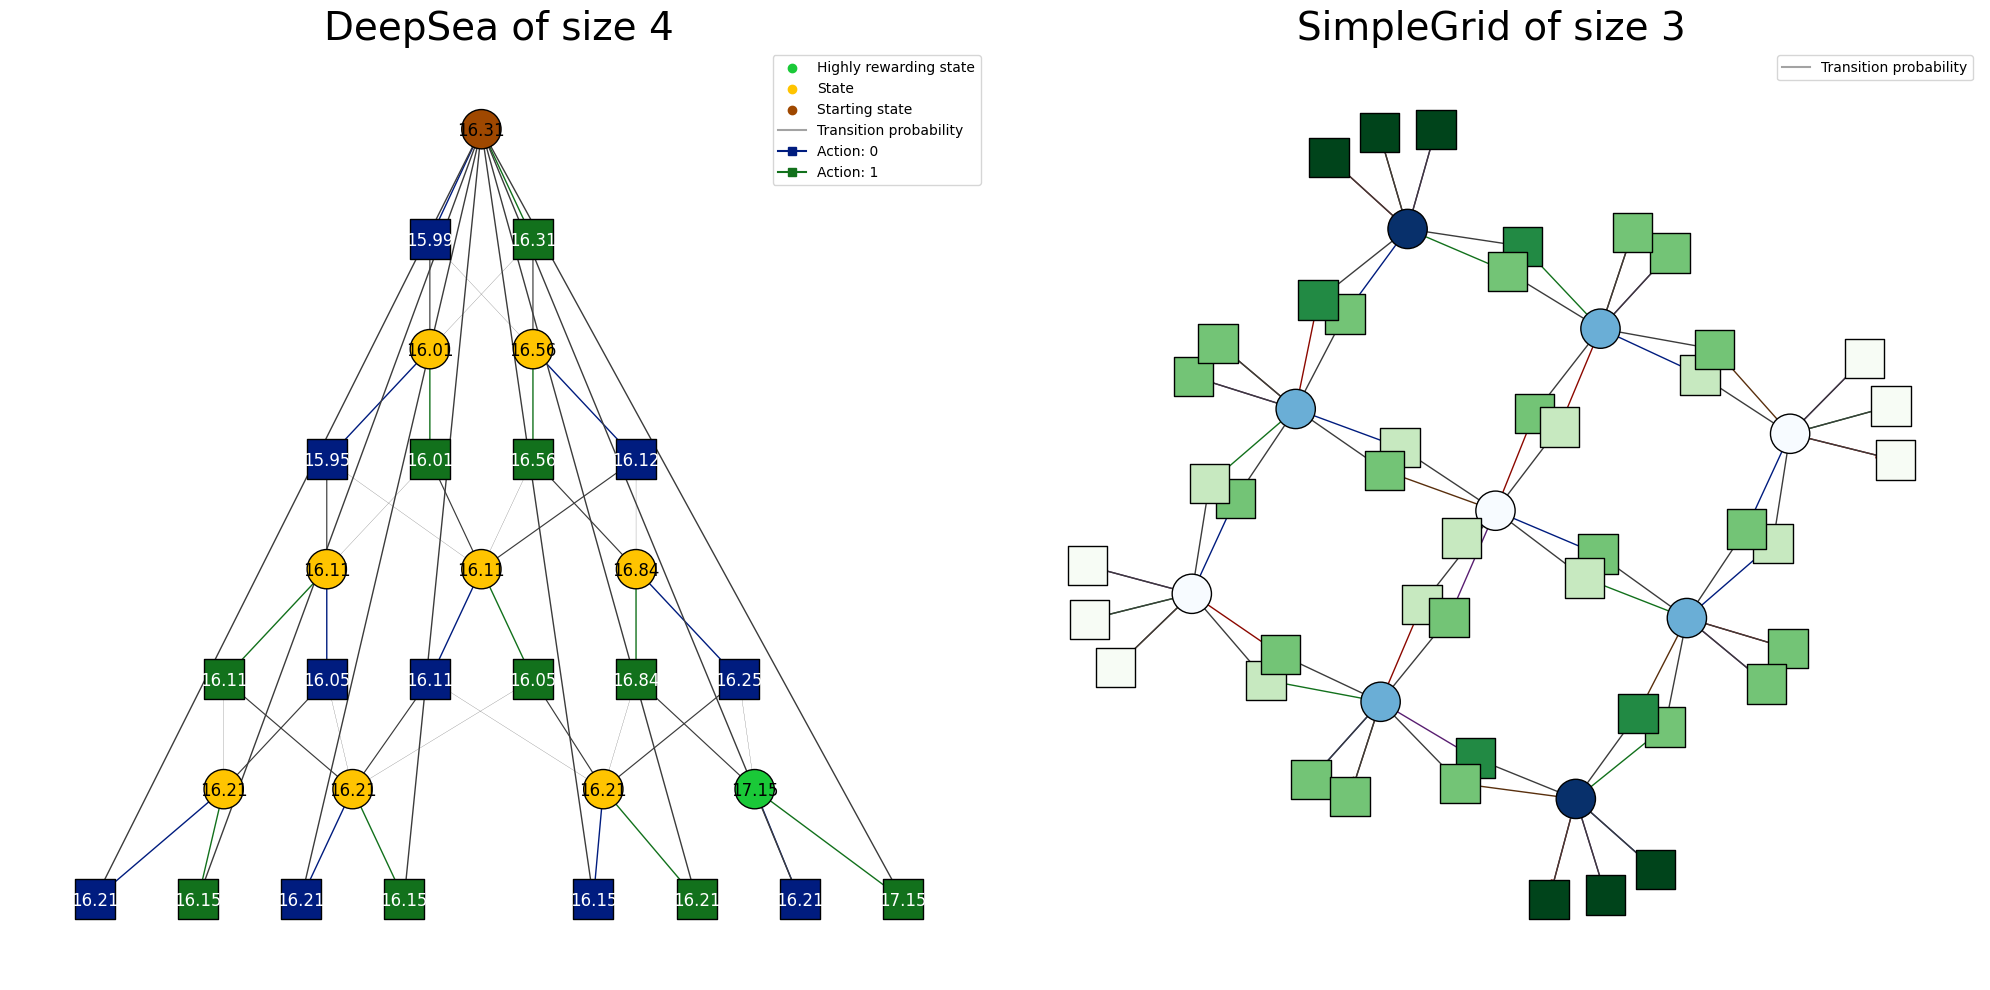

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Compute the value functions
mdp = DeepSeaContinuous(seed=0, size=4, p_rand=0.3)
Q, V = mdp.optimal_value_functions
node_labels = mdp.get_node_labels(V.squeeze().round(2))
action_labels = mdp.get_node_action_labels(Q.round(2))

plot_MDP_graph(
    mdp,
    prog="dot",
    ncol=1,
    node_labels=node_labels,
    action_labels=action_labels,
    int_labels_offset_x=0,
    int_labels_offset_y=0,
    font_color_state_actions_labels="white",
    no_written_state_action_labels=False,
    no_written_state_labels=False,
    node_size=800,
    ax=ax1,
)
ax1.set_title("DeepSea of size 4", fontsize=28)

mdp = SimpleGridContinuous(seed=0, size=3)
Q, V = mdp.optimal_value_functions
# Normalize values for the heatmaps
Q = (Q - Q.min()) / (Q.max() - Q.min())
V = (V - V.min()) / (V.max() - V.min())
node_labels = mdp.get_node_labels(V.squeeze().round(2))
action_labels = mdp.get_node_action_labels(Q.round(2))

plot_MDP_graph(
    mdp,
    ncol=1,
    node_labels=node_labels,
    action_labels=action_labels,
    # Blue heatmap for the state value function
    cm_state_labels=matplotlib.cm.get_cmap("Blues"),
    # Green heatmap for the state-action value function
    cm_state_actions_labels=matplotlib.cm.get_cmap("Greens"),
    node_size=800,
    ax=ax2,
)
ax2.set_title("SimpleGrid of size 3", fontsize=28)

plt.tight_layout()
plt.show()
glue("mdp_representation6", fig, display=False)

````{div} full-width
```{glue:figure} mdp_representation6
```
````